In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it's being processed (with the city number and city name).

In [8]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [36]:
london = requests.get(query_url + "London").json()
london

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 43.27,
  'feels_like': 37.99,
  'temp_min': 39,
  'temp_max': 46.99,
  'pressure': 1013,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 4.7, 'deg': 290},
 'clouds': {'all': 41},
 'dt': 1584312760,
 'sys': {'type': 1,
  'id': 1417,
  'country': 'GB',
  'sunrise': 1584252833,
  'sunset': 1584295494},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [39]:
# Loop through the list of cities and perform a request for data on each
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Beginning Data Retrieval")
print("---------------------------")
for city in cities:
        try:
            response = requests.get(query_url + city).json()
            city_name.append(response['name'])
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed'])
            print(f"Processing record {cities.index(city) + 1} of {len(cities)}")
        except KeyError:
            print("City *not* found. Skipping...")
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
---------------------------
Processing record 1 of 602
Processing record 2 of 602
Processing record 3 of 602
Processing record 4 of 602
Processing record 5 of 602
City *not* found. Skipping...
Processing record 7 of 602
Processing record 8 of 602
Processing record 9 of 602
Processing record 10 of 602
Processing record 11 of 602
Processing record 12 of 602
Processing record 13 of 602
Processing record 14 of 602
Processing record 15 of 602
Processing record 16 of 602
Processing record 17 of 602
Processing record 18 of 602
Processing record 19 of 602
Processing record 20 of 602
Processing record 21 of 602
Processing record 22 of 602
Processing record 23 of 602
City *not* found. Skipping...
Processing record 25 of 602
Processing record 26 of 602
Processing record 27 of 602
City *not* found. Skipping...
Processing record 29 of 602
Processing record 30 of 602
Processing record 31 of 602
Processing record 32 of 602
Processing record 33 of 602
Processing record 34 of 6

Processing record 286 of 602
Processing record 287 of 602
Processing record 288 of 602
Processing record 289 of 602
Processing record 290 of 602
Processing record 291 of 602
Processing record 292 of 602
Processing record 293 of 602
Processing record 294 of 602
Processing record 295 of 602
Processing record 296 of 602
Processing record 297 of 602
Processing record 298 of 602
Processing record 299 of 602
Processing record 300 of 602
Processing record 301 of 602
Processing record 302 of 602
Processing record 303 of 602
Processing record 304 of 602
Processing record 305 of 602
Processing record 306 of 602
Processing record 307 of 602
City *not* found. Skipping...
Processing record 309 of 602
Processing record 310 of 602
Processing record 311 of 602
Processing record 312 of 602
Processing record 313 of 602
Processing record 314 of 602
Processing record 315 of 602
Processing record 316 of 602
Processing record 317 of 602
Processing record 318 of 602
Processing record 319 of 602
Processing re

City *not* found. Skipping...
Processing record 570 of 602
Processing record 571 of 602
Processing record 572 of 602
Processing record 573 of 602
Processing record 574 of 602
Processing record 575 of 602
Processing record 576 of 602
Processing record 577 of 602
Processing record 578 of 602
Processing record 579 of 602
Processing record 580 of 602
Processing record 581 of 602
Processing record 582 of 602
Processing record 583 of 602
Processing record 584 of 602
Processing record 585 of 602
Processing record 586 of 602
Processing record 587 of 602
Processing record 588 of 602
Processing record 589 of 602
Processing record 590 of 602
Processing record 591 of 602
City *not* found. Skipping...
Processing record 593 of 602
Processing record 594 of 602
Processing record 595 of 602
Processing record 596 of 602
Processing record 597 of 602
City *not* found. Skipping...
Processing record 599 of 602
Processing record 600 of 602
Processing record 601 of 602
City *not* found. Skipping...
----------

### Convert Raw Data to DataFrame

Export the city data into a .csv.
Display the DataFrame

In [90]:
weather_df = pd.DataFrame({"Cities": city_name,
                          "Cloudiness": cloudiness,
                          "Country": country,
                          "Date": date,
                          "Humidity": humidity,
                          "Lat": lat,
                          "Lng": lng,
                          "Max Temp": max_temp,
                          "Wind Speed": wind_speed})
weather_df

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Margate,75,GB,1584313155,100,51.38,1.39,48.20,2.24
1,Bluff,87,NZ,1584313155,80,-46.60,168.33,55.99,10.00
2,Kapaa,75,US,1584312917,69,22.08,-159.32,80.60,11.41
3,Vila Franca do Campo,20,PT,1584313155,81,37.72,-25.43,53.60,4.70
4,Padang,84,ID,1584313155,88,-0.95,100.35,70.21,5.32
...,...,...,...,...,...,...,...,...,...
553,Mânăstirea,19,RO,1584313040,15,44.22,26.90,36.00,3.00
554,Bud,90,US,1584313040,83,39.45,-86.18,45.00,5.82
555,Magdalena,40,PH,1584313041,74,14.20,121.43,80.60,5.82
556,Olafsvik,100,IS,1584312857,78,64.89,-23.71,31.71,22.41


In [108]:
weather_df.to_csv(output_data_file, index=False, header=True)

## Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

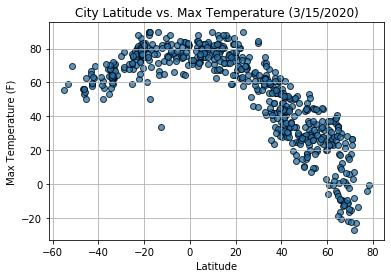

In [59]:
plt.scatter(lat, max_temp, marker="o", edgecolor="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (3/15/2020)")
plt.grid()
# Save figure to Output_data folder
plt.savefig("../Output_data/LatvsMaxTemp.png")
plt.show()

In [69]:
print("The above plot shows the relationship between a city's distance from the equator and its max temperature.")

The above plot shows the relationship between a city's distance from the equator and its max temperature.


### Latitude vs. Humidity Plot

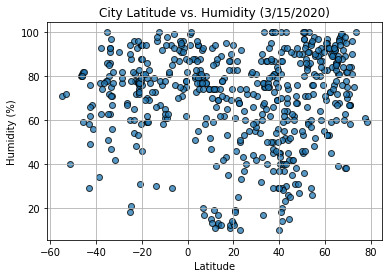

In [60]:
plt.scatter(lat, humidity, marker="o", edgecolor="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (3/15/2020)")
plt.grid()
# Save figure to Output_data folder
plt.savefig("../Output_data/LatvsHumidity.png")
plt.show()

In [68]:
print("The above plot shows the relationship between the humidity of a city's distance from the equator and its humidity.")

The above plot shows the relationship between the humidity of a city's distance from the equator and its humidity.


### Latitude vs. Cloudiness Plot

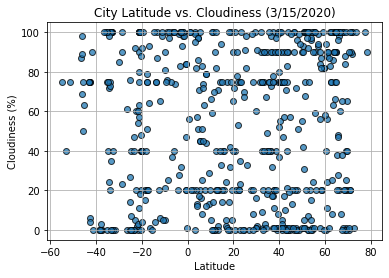

In [63]:
plt.scatter(lat, cloudiness, marker="o", edgecolor="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (3/15/2020)")
plt.grid()
# Save figure to Output_data folder
plt.savefig("../Output_data/LatvsCloudiness.png")
plt.show()

In [70]:
print("The above plot shows the relationship between a city's its distance from the equator and its cloudiness.")

The above plot shows the relationship between a city's its distance from the equator and its cloudiness.


###  Latitude vs. Wind Speed Plot

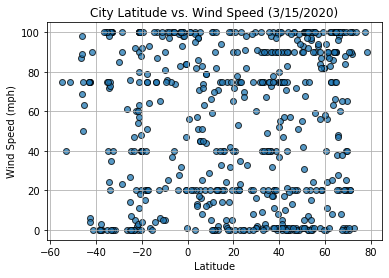

In [65]:
plt.scatter(lat, cloudiness, marker="o", edgecolor="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (3/15/2020)")
plt.grid()
# Save figure to Output_data folder
plt.savefig("../Output_data/LatvsWindSpeed.png")
plt.show()

In [66]:
print("The above plot shows the relationship between a city's distance from the equator and its wind speed.")

The above plot shows the relationship between a city's distance from the equator and its wind speed.


In [91]:
northern_hemisphere_df = weather_df.loc[weather_df["Lat"] >= 0, :]
northern_hemisphere_df

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Margate,75,GB,1584313155,100,51.38,1.39,48.20,2.24
2,Kapaa,75,US,1584312917,69,22.08,-159.32,80.60,11.41
3,Vila Franca do Campo,20,PT,1584313155,81,37.72,-25.43,53.60,4.70
6,Brae,40,GB,1584313156,69,60.40,-1.35,37.40,4.70
7,Egvekinot,98,RU,1584312918,97,66.32,-179.17,12.70,4.59
...,...,...,...,...,...,...,...,...,...
552,Abu Kamal,67,SY,1584313040,65,34.45,40.92,60.22,6.33
553,Mânăstirea,19,RO,1584313040,15,44.22,26.90,36.00,3.00
554,Bud,90,US,1584313040,83,39.45,-86.18,45.00,5.82
555,Magdalena,40,PH,1584313041,74,14.20,121.43,80.60,5.82


In [92]:
southern_hemisphere_df = weather_df.loc[weather_df["Lat"] < 0, :]
southern_hemisphere_df

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Bluff,87,NZ,1584313155,80,-46.60,168.33,55.99,10.00
4,Padang,84,ID,1584313155,88,-0.95,100.35,70.21,5.32
5,Ushuaia,75,AR,1584313156,71,-54.80,-68.30,55.40,18.34
11,Mataura,89,NZ,1584312998,80,-46.19,168.86,55.99,10.00
14,Saint-Philippe,100,RE,1584313157,73,-21.36,55.77,77.00,9.17
...,...,...,...,...,...,...,...,...,...
534,Kununurra,0,AU,1584313036,73,-15.77,128.73,77.00,4.36
537,Arica,15,CL,1584313036,69,-18.48,-70.30,75.20,10.29
543,Port Lincoln,75,AU,1584313038,51,-34.73,135.87,70.32,13.62
548,Parakai,100,NZ,1584313039,77,-36.65,174.43,71.01,4.70


## Linear Regression

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is -0.892849210921271


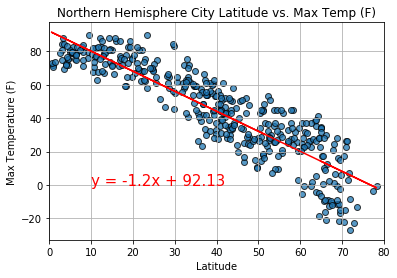

In [81]:
x_values_north = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]

# Create plot of max temperature vs. latitude for N Hemisphere cities
plt.scatter(x_values_north, y_values, edgecolor="black", alpha=0.75)

# Create linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values_north,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs. Max Temp (F)")
plt.xlabel("Latitude")
plt.xlim(0,80)
plt.ylabel("Max Temperature (F)")
plt.grid()
print(f"The r-squared value is {rvalue}")
plt.savefig("../Output_data/N_Hem_LatvsMaxTemp")
plt.show()

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.6122738238593968


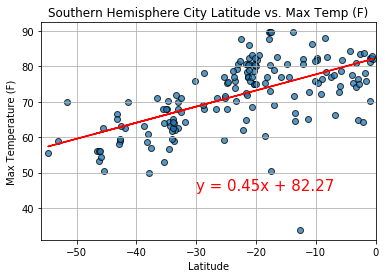

In [88]:
x_values_south = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]

# Create plot of max temperature vs. latitude for N Hemisphere cities
plt.scatter(x_values_south, y_values, edgecolor="black", alpha=0.75)

# Create linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values_south,regress_values,"r-")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs. Max Temp (F)")
plt.xlabel("Latitude")
plt.xlim(-56,0)
plt.ylabel("Max Temperature (F)")
plt.grid()
print(f"The r-squared value is {rvalue}")
plt.savefig("../Output_data/S_Hem_LatvsMaxTemp")
plt.show()

### Observations/Analysis

The two plots above show the relationship between latitude and max temperatures for cities in the Northern Hemisphere compared to cities in the Southern Hemisphere. For cities in the Northern Hemisphere, the max temperature decreases with latitude, indicating that the further a city is from the equator, the lower its max temperature is. For cities in the Southern Hemisphere, the max temperature increases with latitude, indicating that the closer a city is to the equator, the higher its max temperature is. Both graphs show that cities closer to the equator have higher max temperatures than cities further away.

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.1960606719449203


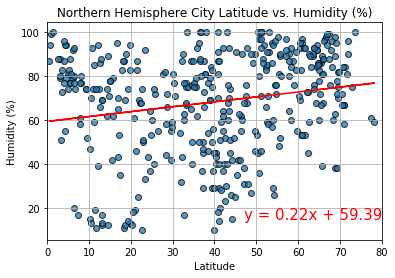

In [102]:
y_values = northern_hemisphere_df["Humidity"]

# Create plot of max temperature vs. latitude for N Hemisphere cities
plt.scatter(x_values_north, y_values, edgecolor="black", alpha=0.75)

# Create linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values_north,regress_values,"r-")
plt.annotate(line_eq,(47,15),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(0,80)
plt.ylabel("Humidity (%)")
plt.grid()
print(f"The r-squared value is {rvalue}")
plt.savefig("../Output_data/N_Hem_LatvsHumidity")
plt.show()

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.22625847438738278


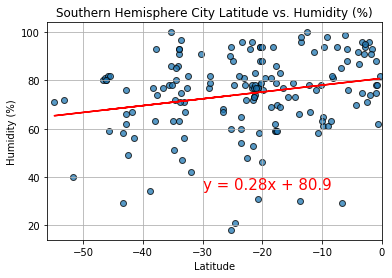

In [107]:
y_values = southern_hemisphere_df["Humidity"]

# Create plot of max temperature vs. latitude for N Hemisphere cities
plt.scatter(x_values_south, y_values, edgecolor="black", alpha=0.75)

# Create linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values_south,regress_values,"r-")
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-56,0)
plt.ylabel("Humidity (%)")
plt.grid()
print(f"The r-squared value is {rvalue}")
plt.savefig("../Output_data/S_Hem_LatvsHumidity")
plt.show()

### Observations/Analysis

The two plots above show the relationship between a city's humidity and its distance from the equator. For cities in both hemispheres, the humidity increases as latitude increases, indicating that cities further north have higher humidity than cities further south. This does make sense, as in the Northern Hemisphere it's the end of winter, which tends to bring more precipitation. However, the low r-squared values indicate that the relationship between humidity and latitude isn't very strong.

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.14316502181873209


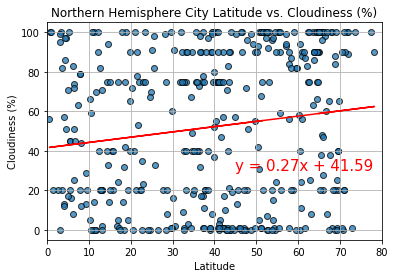

In [111]:
y_values = northern_hemisphere_df["Cloudiness"]

# Create plot of max temperature vs. latitude for N Hemisphere cities
plt.scatter(x_values_north, y_values, edgecolor="black", alpha=0.75)

# Create linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values_north,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(0,80)
plt.ylabel("Cloudiness (%)")
plt.grid()
print(f"The r-squared value is {rvalue}")
plt.savefig("../Output_data/N_Hem_LatvsCloudiness")
plt.show()

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.09734883956682207


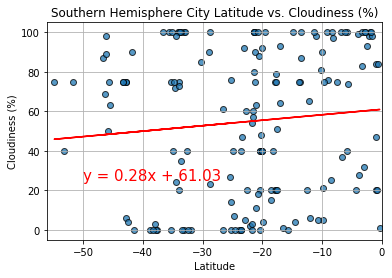

In [114]:
y_values = southern_hemisphere_df["Cloudiness"]

# Create plot of max temperature vs. latitude for N Hemisphere cities
plt.scatter(x_values_south, y_values, edgecolor="black", alpha=0.75)

# Create linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values_south,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(-56,0)
plt.ylabel("Cloudiness (%)")
plt.grid()
print(f"The r-squared value is {rvalue}")
plt.savefig("../Output_data/S_Hem_LatvsCloudiness")
plt.show()

### Observations/Analysis

The above graphs show the relationship between latitude and cloudiness for cities in both hemispheres. The relationship between cloudiness and latitude is positive in both graphs, indicating that as latitude increases, cloudiness also increases. This does make sense, as in the Northern Hemisphere it's the end of winter, which tends to be more cloudy. However, the low r-squared values indicate that the relationship between cloudiness and latitude isn't very strong.

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.15817233531591238


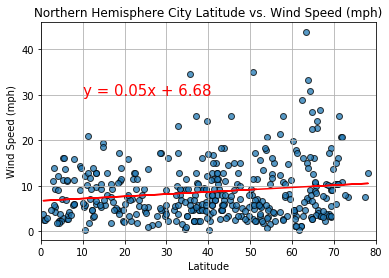

In [116]:
y_values = northern_hemisphere_df["Wind Speed"]

# Create plot of max temperature vs. latitude for N Hemisphere cities
plt.scatter(x_values_north, y_values, edgecolor="black", alpha=0.75)

# Create linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values)
regress_values = x_values_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values_north,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(0,80)
plt.ylabel("Wind Speed (mph)")
plt.grid()
print(f"The r-squared value is {rvalue}")
plt.savefig("../Output_data/N_Hem_LatvsWindSpeed")
plt.show()

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is -0.37975668937084245


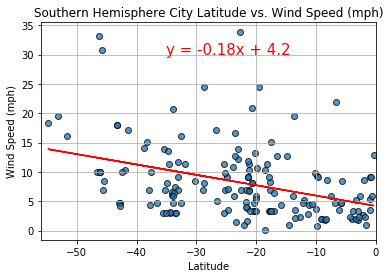

In [118]:
y_values = southern_hemisphere_df["Wind Speed"]

# Create plot of max temperature vs. latitude for N Hemisphere cities
plt.scatter(x_values_south, y_values, edgecolor="black", alpha=0.75)

# Create linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south, y_values)
regress_values = x_values_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values_south,regress_values,"r-")
plt.annotate(line_eq,(-35,30),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-56,0)
plt.ylabel("Wind Speed (mph)")
plt.grid()
print(f"The r-squared value is {rvalue}")
plt.savefig("../Output_data/S_Hem_LatvsWindSpeed")
plt.show()

### Observations/Analysis

The above graphs show the relationship between latitude and wind speed for cities in both hemispheres. For cities in the Northern Hemisphere, there is a positive relationship between latitude and wind speed, while cities further south have a negative relationship between latitude and wind speed. This indicates that cities closer to the equator have lower wind speeds than cities further away. However, the low r-squared values for both plots indicate that the relationship between latitude and wind speed isn't very strong.